<a href="https://colab.research.google.com/github/sonu6084/SHALA2020/blob/master/5.Assignment_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [0]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [0]:
y = attrition_data['Attrition']
X = attrition_data.drop(labels='Attrition',axis=1)

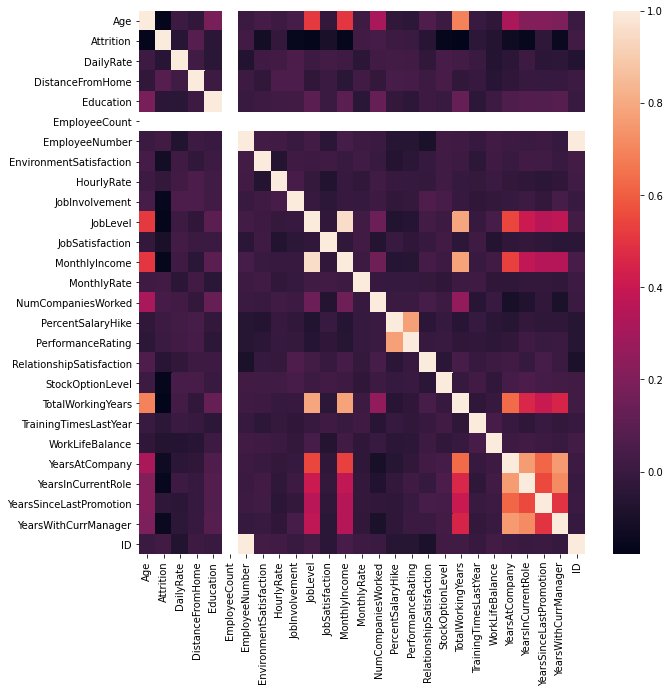

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(attrition_data.corr())

In [0]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [0]:
# no null values
attrition_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

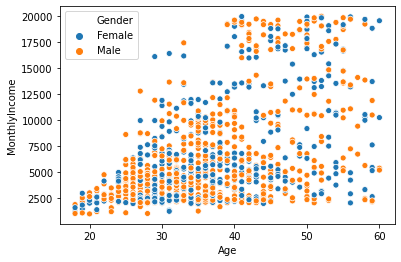

In [0]:
sns.scatterplot(x=attrition_data.Age,y=attrition_data.MonthlyIncome,hue=attrition_data.Gender)

In [0]:
# deleting id and employee number as it does not effect any other factor
X.drop(labels=['ID','EmployeeNumber','EmployeeCount'],axis=1,inplace=True)

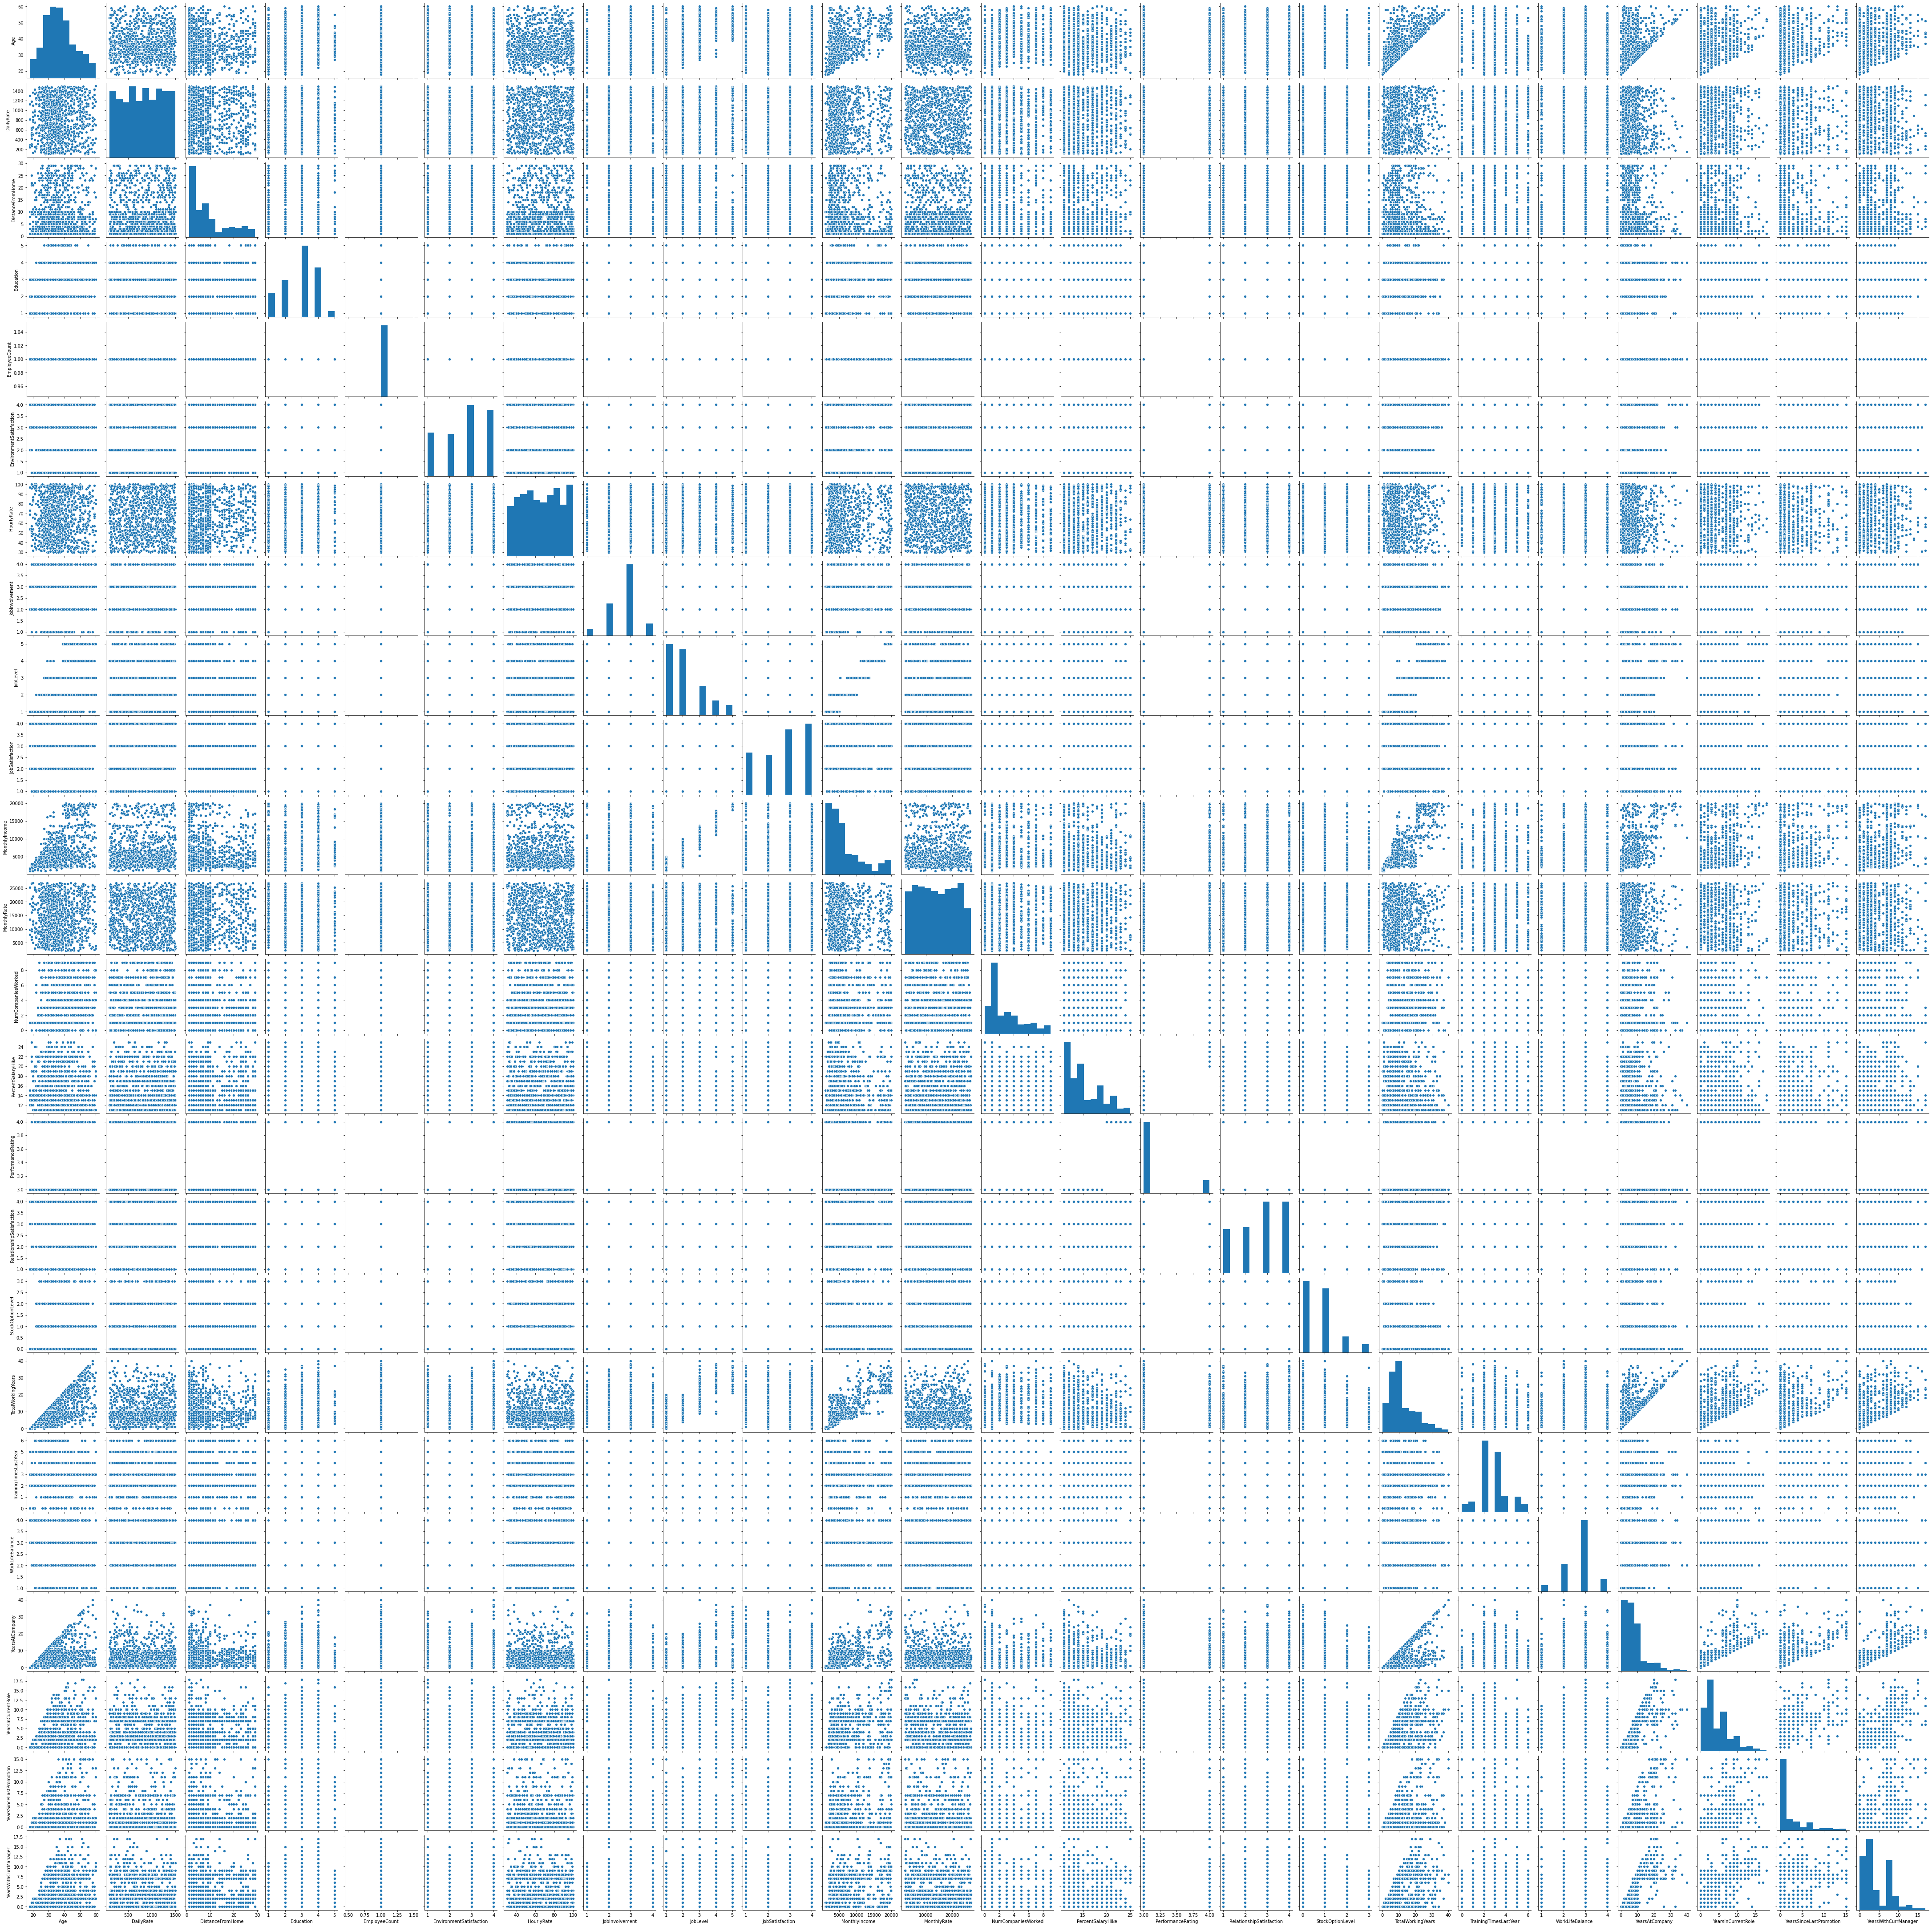

In [0]:
sns.pairplot(X)

In [0]:
dummy_variables = ['BusinessTravel','Department','EducationField','Gender','JobRole','OverTime','MaritalStatus']

df = attrition_data['Age']

for i in dummy_variables:
  dum = pd.get_dummies(attrition_data[i],drop_first=True)
  df = pd.concat([df,dum],axis=1)
  X.drop(labels=[i],axis=1,inplace=True)

df.drop(labels='Age',axis=1,inplace=True)



In [0]:
X = pd.concat([X,df],axis=1)

In [0]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree,Male,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Yes,Married,Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,1255,1,2,1,90,3,1,1,2066,10494,2,22,4,4,1,5,3,4,3,2,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1024,47,359,2,4,1,82,3,4,3,17169,26703,3,19,3,2,2,26,2,4,20,17,5,6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1025,24,1476,4,1,4,42,3,2,3,4162,15211,1,12,3,3,2,5,3,3,5,4,0,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1026,32,601,7,5,4,97,3,2,4,9204,23343,4,12,3,3,1,7,3,2,4,3,0,3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)


In [0]:
#elbow method for knn
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  predictions_i = knn.predict(X_test)
  error_rate.append(np.mean(predictions_i != y_test))

print(np.argmin(np.array(error_rate)))

10


In [0]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)
predictions_xgb = xgb_clf.predict(X_test)

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
predictions_dtc = dtc.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(100)
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print("\nKNN\n",confusion_matrix(y_test,predictions_knn))
print("\nXGB\n",confusion_matrix(y_test,predictions_xgb))
print("\nRandom Forest\n",confusion_matrix(y_test,predictions_rfc))
print("\nDecision tree\n",confusion_matrix(y_test,predictions_dtc))


KNN
 [[177   0]
 [ 28   1]]

XGB
 [[175   2]
 [ 19  10]]

Random Forest
 [[175   2]
 [ 26   3]]

Decision tree
 [[155  22]
 [ 20   9]]


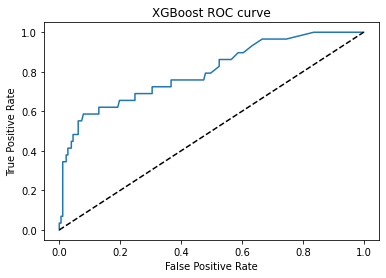

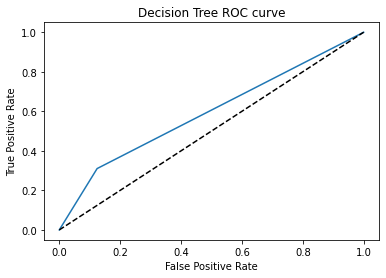

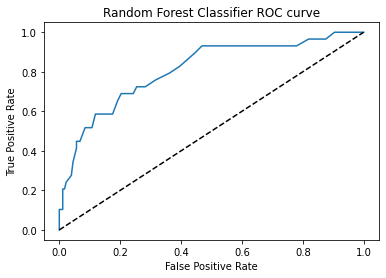

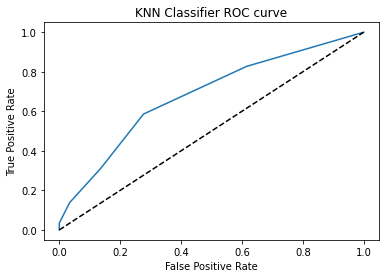

In [0]:
from sklearn.metrics import roc_curve  

def roc_plot(c_name,classifier):
  probs = classifier.predict_proba(X_test)  
  probs = probs[:, 1]  
  fper, tper, thresholds = roc_curve(y_test, probs) 
  plt.plot(fper, tper)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('{} ROC curve'.format(c_name))
  # show the plot
  plt.show()


roc_plot("XGBoost",xgb_clf)
roc_plot("Decision Tree",dtc)
roc_plot("Random Forest Classifier",rfc)
roc_plot("KNN Classifier",knn)

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  